In [3]:
import numpy as np 
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt 
from shapely.geometry import Point
import seaborn as sns
from plotnine import *
from pysal.explore import esda
from pysal.lib import weights 
from matplotlib import colors
%matplotlib inline 
%config InlineBackend.figure_format='retina'
# set mamp general general aspect 
plt.rcParams['figure.dpi'] = 80
# set figures path 
Fig = 'Figures/'

C:\Users\Mohamed\miniconda3\lib\site-packages\pysal\explore\segregation\network\network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
C:\Users\Mohamed\miniconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.


# 1. Evolution of the COVID-related mortality rate in European countries

In [7]:
# figure 1 
ds = pd.read_excel('../../02_Data/02_Pandemic variables/03_Exc. Mortality/Excess_mortality_database_v220103.xls',
              sheet_name = 'Excess_mortality_Abs', skiprows = 1).drop(['Code 2016', 'NUTS level 3', 'Pop_2020'], axis =1)

In [8]:
ds = ds.groupby('Country code').mean().T
ds

Country code,AL,AT,BE,BG,CH,CY,CZ,DE,DK,EE,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
2020_W01,-3.766667,-5.577143,-3.554545,-16.892857,-5.946154,21.2,-4.314286,-29.390625,-0.400000,-16.566667,...,-4.455,-6.454545,-0.556164,-11.888,-13.809524,-14.744,-7.304762,-21.6,-1.475,1.678212
2020_W02,-3.116667,-4.434286,-0.990909,-10.571429,-4.369231,15.2,-1.257143,-12.765625,3.181818,-6.200000,...,0.290,1.454545,-3.706849,-6.112,-12.509524,-12.704,-2.933333,-30.2,-6.100,-10.703911
2020_W03,-6.233333,0.297143,-2.472727,-12.278571,-2.730769,26.8,-10.357143,-37.515625,-2.854545,-8.533333,...,-3.285,-5.872727,-6.580822,-3.816,-10.161905,-3.504,-5.542857,-35.8,-14.250,-9.215642
2020_W04,-3.100000,0.908571,-4.963636,-4.135714,-1.600000,11.2,-3.514286,-64.968750,-6.090909,-12.133333,...,-7.255,-3.436364,-8.213699,-6.544,-11.071429,1.184,-9.219048,-20.4,-6.675,-10.992179
2020_W05,-2.466667,3.662857,-3.500000,-0.764286,-1.576923,21.2,-2.971429,-37.609375,-5.018182,-10.800000,...,-3.605,-6.490909,-4.268493,-0.224,-9.123810,2.096,-1.838095,-11.4,-7.750,-6.649162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021_W39,NaN,5.737143,0.759091,36.635714,2.638462,24.2,3.914286,85.281250,14.363636,60.400000,...,9.355,5.290909,9.887671,5.464,66.619048,56.832,3.266667,78.6,13.475,8.926257
2021_W40,NaN,2.748571,1.886364,39.400000,-1.384615,13.2,-0.914286,88.359375,8.509091,51.200000,...,8.680,5.945455,11.690411,8.464,105.352381,62.248,-1.961905,35.6,28.075,9.186592
2021_W41,NaN,3.342857,4.318182,49.892857,1.784615,25.2,6.185714,83.812500,15.381818,72.600000,...,6.030,4.000000,13.175342,10.424,135.747619,57.968,-0.800000,69.2,26.700,7.934078
2021_W42,NaN,6.280000,7.431818,62.221429,1.915385,21.8,15.085714,144.765625,13.200000,71.600000,...,12.725,8.400000,15.797260,3.832,150.423810,46.944,2.323810,97.2,37.575,8.556425


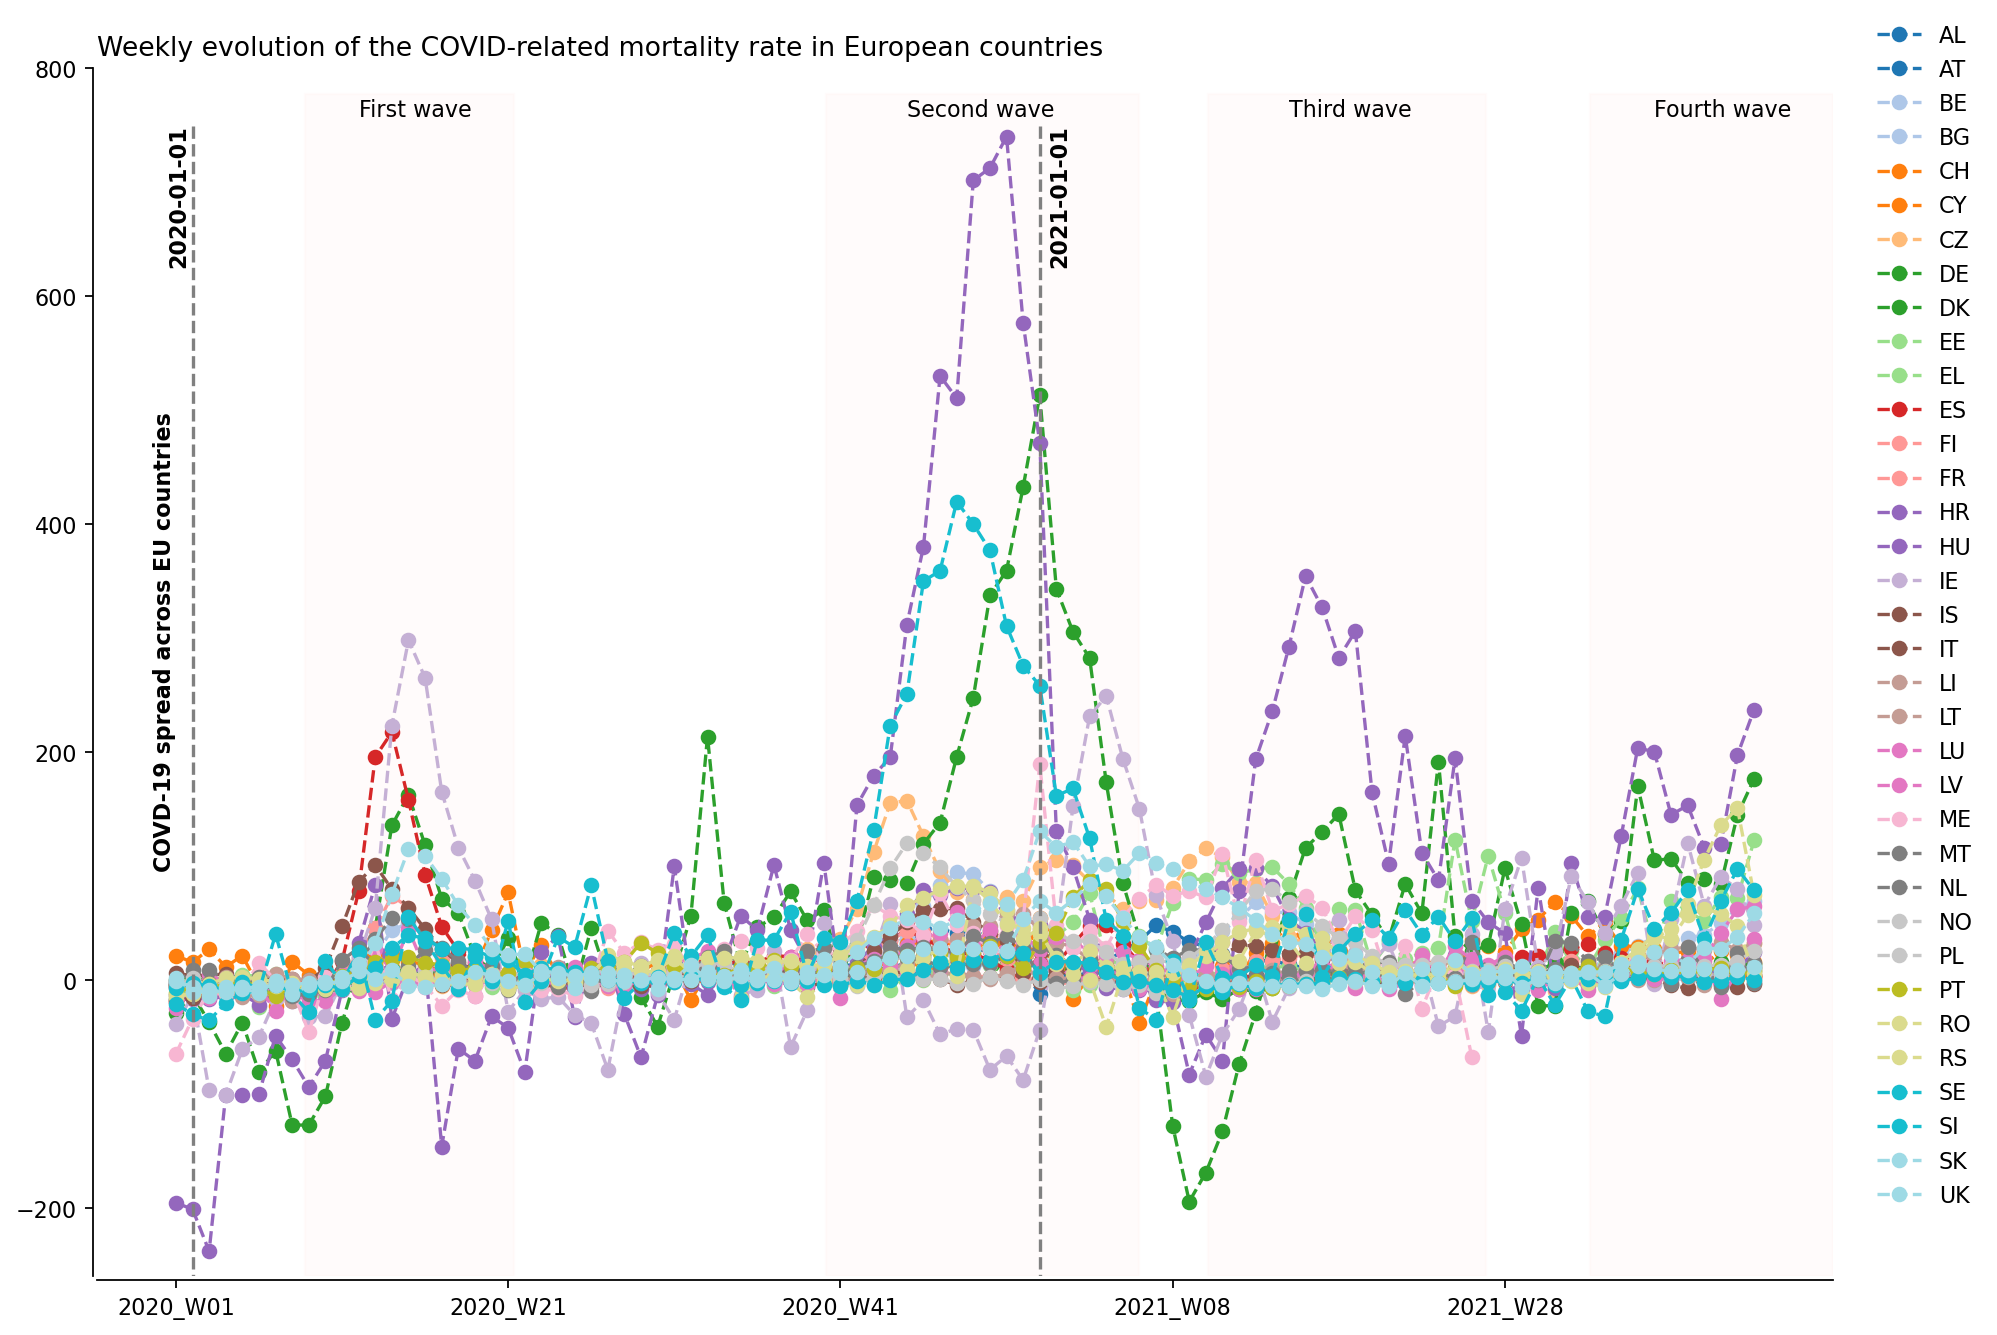

In [10]:
with plt.style.context('seaborn-deep'):
    ds.plot(figsize = (14,10), marker = 'o', linestyle = '--', cmap = 'tab20')
plt.title('Weekly evolution of the COVID-related mortality rate in European countries',
          loc = 'left', fontweight = 'light')

plt.text(x = -1.4, y = 100, s = 'COVD-19 spread across EU countries', rotation = 90, fontweight = 'bold')
# add the years 
plt.vlines(x = 1, ymin = -300, ymax = 750, color = 'grey', linestyle = 'dashed')
plt.text(x = -0.5, y = 630, s = '2020-01-01', rotation = 90, fontweight = 'bold')

plt.vlines(x = 52, ymin = -300, ymax = 750, color = 'grey', linestyle = 'dashed')
plt.text(x = 52.5, y = 630, s = '2021-01-01', rotation = 90, fontweight = 'bold')

# add the waves 
plt.axhspan(xmin =0.12, xmax = 0.24, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = 11, y = 758, s = 'First wave', fontweight = 'light')

plt.axhspan(xmin =0.42, xmax = 0.6, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = 44, y = 758, s = 'Second wave', fontweight = 'light')

plt.axhspan(xmin =0.64, xmax = 0.8, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = 67, y = 758, s = 'Third wave', fontweight = 'light')


plt.axhspan(xmin =0.86, xmax = 1, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = 89, y = 758, s = 'Fourth wave', fontweight = 'light')

plt.ylim([-260, 800])
plt.legend(loc = [1.02, .05], frameon = False).set_title('')
sns.despine(offset=2)

# plt.savefig(Fig + 'Figure_01.png', dpi = 500)

In [ ]:
## use my plot -points- 



# 2. COVID-19 deaths rate per 10_000 inhabitants (three waves)

Draw three maps corresponding to each COVID-19 wave.

In [11]:
## read the shape file 
shape = gpd.read_file('../../02_Data/01_GIS/02_Full file/NUTS_COVID.shp')[['NUTS_ID', 'geometry']]
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = pd.read_csv('../../02_Data/world_cities.txt')
# turn lat and lng values into geodata 
geo_points = [Point(x,y) for x,y in zip(cities['lng'], cities['lat'])]
cities = gpd.GeoDataFrame(cities, geometry = geo_points)
major_cities = cities[cities['city'].isin(['Paris', 'London', 'Berlin', 'Madrid',  
                                           'Rome', 'Bucharest','Vienna', 'Milan', 
                                           'Copenhagen', 'Frankfurt'])]
minor_cities = cities[cities['city'].isin(['Barcelona', 'Hamburg', 'Warsaw', 'Budapest', 
                                           'Munich', 'The Hague', 'Belgrade', 'Sofia',
                                           'Prague', 'Sevilla', 'Dublin', 'Cologne',
                                           'Athens', 'Riga'])]

In [12]:
## read the deaths data 
deaths = pd.read_excel('../../02_Data/02_Pandemic variables/02_Deaths/EU_Deaths_Daily_Unstacked.xlsx', index_col = 'nuts_id').drop('country', axis =1)
# deaths waves 
deaths['D_first_wave'] = deaths.loc[:, pd.to_datetime('2020-03-01') : pd.to_datetime('2020-05-01')].sum(axis =1)
deaths['D_second_wave'] = deaths.loc[:, pd.to_datetime('2020-09-01') : pd.to_datetime('2021-05-01')].sum(axis =1)
deaths['D_third_wave'] = deaths.loc[:, pd.to_datetime('2021-07-01') : pd.to_datetime('2021-12-01')].sum(axis =1)
deaths = deaths.filter(like = 'wave')
# read the popualtion data 

population = pd.read_excel('../../02_Data/Population_2020.xlsx').drop_duplicates(subset = 'NUTS_ID')
population['Population'].replace(':', np.nan, inplace = True)
population = population.dropna(subset = ['Population'])
d = pd.merge(deaths, population, left_on = deaths.index, right_on = "NUTS_ID")
for col in deaths.columns:
    d[col] = (d[col] / d['Population']) * 10_000

In [13]:
geo_d_rate = gpd.GeoDataFrame(pd.merge(d, shape, left_on = 'NUTS_ID', right_on = 'NUTS_ID'))

In [14]:
# convert the geo data 
shape = shape.to_crs(epsg = 3035)
geo_d_rate = geo_d_rate.to_crs(epsg = 3035)
world = world.to_crs(epsg = 3035)
major_cities.crs = "epsg:4326"; minor_cities.crs = "epsg:4326"
major_cities = major_cities.to_crs(epsg = 3035)
minor_cities = minor_cities.to_crs(epsg = 3035)

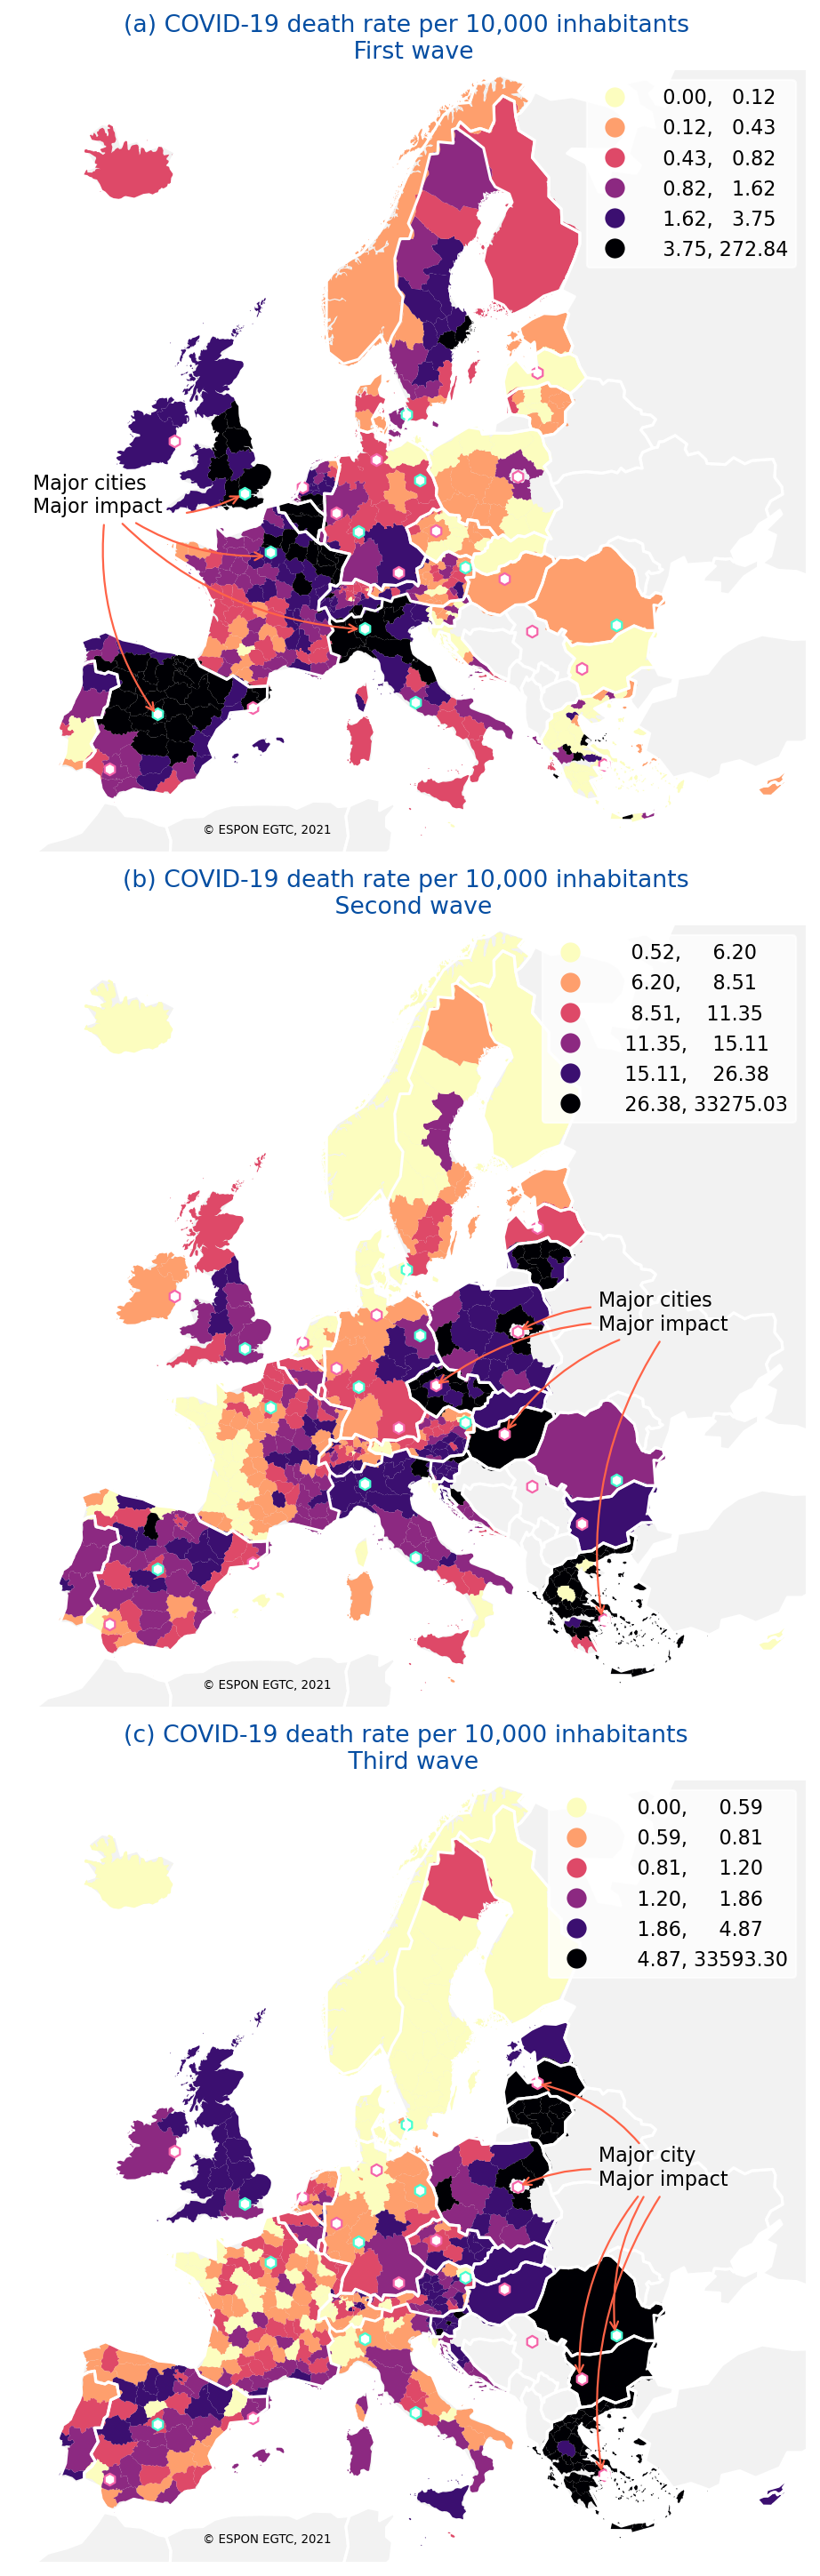

In [50]:
# plot the maps 

fig, ax = plt.subplots(3,1, figsize = (19, 18), constrained_layout = True)
world.plot(ax = ax[0], color = 'grey', alpha = .1)
geo_d_rate.plot(column = 'D_first_wave', ax = ax[0], cmap='magma_r', scheme='quantiles', k = 6, legend = True)
ax[0].set_xlim(2.4e6, 6.6e6)
ax[0].set_ylim(0.13e7, 0.545e7)
ax[0].set_title('(a) COVID-19 death rate per 10,000 inhabitants \n First wave', loc = 'center', color = '#054ea2')

# legend 
leg = ax[0].get_legend()
leg.get_frame().set_color('w')
# annotate 
# Paris 
ax[0].annotate("Major cities \nMajor impact", xy=(3.75e6, 2.87e6), xytext=(2.5e6, 3.1e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))
# Madrid
ax[0].annotate("                       ", xy=(3.16e6, 2.02e6), xytext=(2.5e6, 3.1e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

# Milan 
ax[0].annotate("                       ", xy=(4.25e6, 2.48e6), xytext=(2.5e6, 3.1e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

# London
ax[0].annotate("                       ", xy=(3.62e6, 3.20e6), xytext=(2.5e6, 3.1e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

################################# second map 

world.plot(ax = ax[1], color = 'grey', alpha = .1)
geo_d_rate.plot(column = 'D_second_wave', ax = ax[1], cmap='magma_r', scheme='quantiles', k = 6, legend = True)
ax[1].set_title('(b) COVID-19 death rate per 10,000 inhabitants \n Second wave', loc ='center', color = '#054ea2')
ax[1].set_xlim(2.4e6, 6.6e6)
ax[1].set_ylim(0.13e7, 0.545e7)
# legend 
leg = ax[1].get_legend()
leg.get_frame().set_color('w')

# annotate 
# Warsaw 
ax[1].annotate("Major cities \nMajor impact", xy=(5.07e6, 3.29e6), xytext=(5.5e6, 3.3e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))
# Prague 
ax[1].annotate("                       ", xy=(4.63e6, 3.00e6), xytext=(5.5e6, 3.3e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

# Budapest  
ax[1].annotate("                       ", xy=(5.00e6, 2.75e6), xytext=(5.5e6, 3.3e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

# Athens  
ax[1].annotate("                       ", xy=(5.52e6, 1.76e6), xytext=(5.5e6, 3.3e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

################################# third map 

world.plot(ax = ax[2], color = 'grey', alpha = .1)
geo_d_rate.plot(column = 'D_third_wave', ax = ax[2], cmap='magma_r', scheme='quantiles', k = 6, legend = True)
ax[2].set_title('(c) COVID-19 death rate per 10,000 inhabitants \n Third wave', loc = 'center', color = '#054ea2')
ax[2].set_xlim(2.4e6, 6.6e6)
ax[2].set_ylim(0.13e7, 0.545e7)
# legend 
leg = ax[2].get_legend()
leg.get_frame().set_color('w')

# annotate 
# Bucharest 
ax[2].annotate("Major city \nMajor impact", xy=(5.59e6, 2.5e6), xytext=(5.5e6, 3.3e6),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

# Athens 
ax[2].annotate("                       ", xy=(5.52e6, 1.76e6), xytext=(5.5e6, 3.3e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

# Warsaw 
ax[2].annotate("                  ", xy=(5.07e6, 3.29e6), xytext=(5.5e6, 3.3e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

# Riga 
ax[2].annotate("                 ", xy=(5.17e6, 3.84e6), xytext=(5.5e6, 3.4e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))


# Sofia 
ax[2].annotate("                 ", xy=(5.40e6,  2.27e6), xytext=(5.5e6, 3.3e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

################################# wrap up & clean 

for i in range(3): 
    ax[i].axis('off')
    major_cities.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#44FFD2')
    minor_cities.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#F564A9')
    ax[i].text(x = 3.4e6, y = 1.4e6, s = u"\u00A9 ESPON EGTC, 2021", fontsize = 6)
    world[~(world['iso_a3'].isin(["IRL", "GBR", "ISL","SWE", "ITA"]))].boundary.plot(color = 'w', linewidth = 1.4 , zorder  =1, ax =ax[i])

plt.show()

# plt.savefig(Fig + 'Figure_02.png', dpi = 500)

## 3. Fatality rate vs Mortality Rate  

## Classification 

In [16]:
from esda.moran import Moran_Local

In [17]:
# Generate W from the GeoDataFrame
w = weights.distance.KNN.from_dataframe(geo_d_rate, k=8)
# Row-standardization
w.transform = 'R'

In [43]:
lisa_1 = esda.moran.Moran_Local(geo_d_rate['D_first_wave'], w)
lisa_2 = esda.moran.Moran_Local(geo_d_rate['D_second_wave'], w)
lisa_3 = esda.moran.Moran_Local(geo_d_rate['D_third_wave'], w)

In [42]:
counts = pd.value_counts(lisa_1.q)
counts

3    281
1     81
2     54
4     18
dtype: int64

In [52]:
spots

array([0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3,
       0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 3, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,
       3, 1, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 3, 3, 3,

(2400000.0, 6600000.0, 1300000.0, 5450000.0)

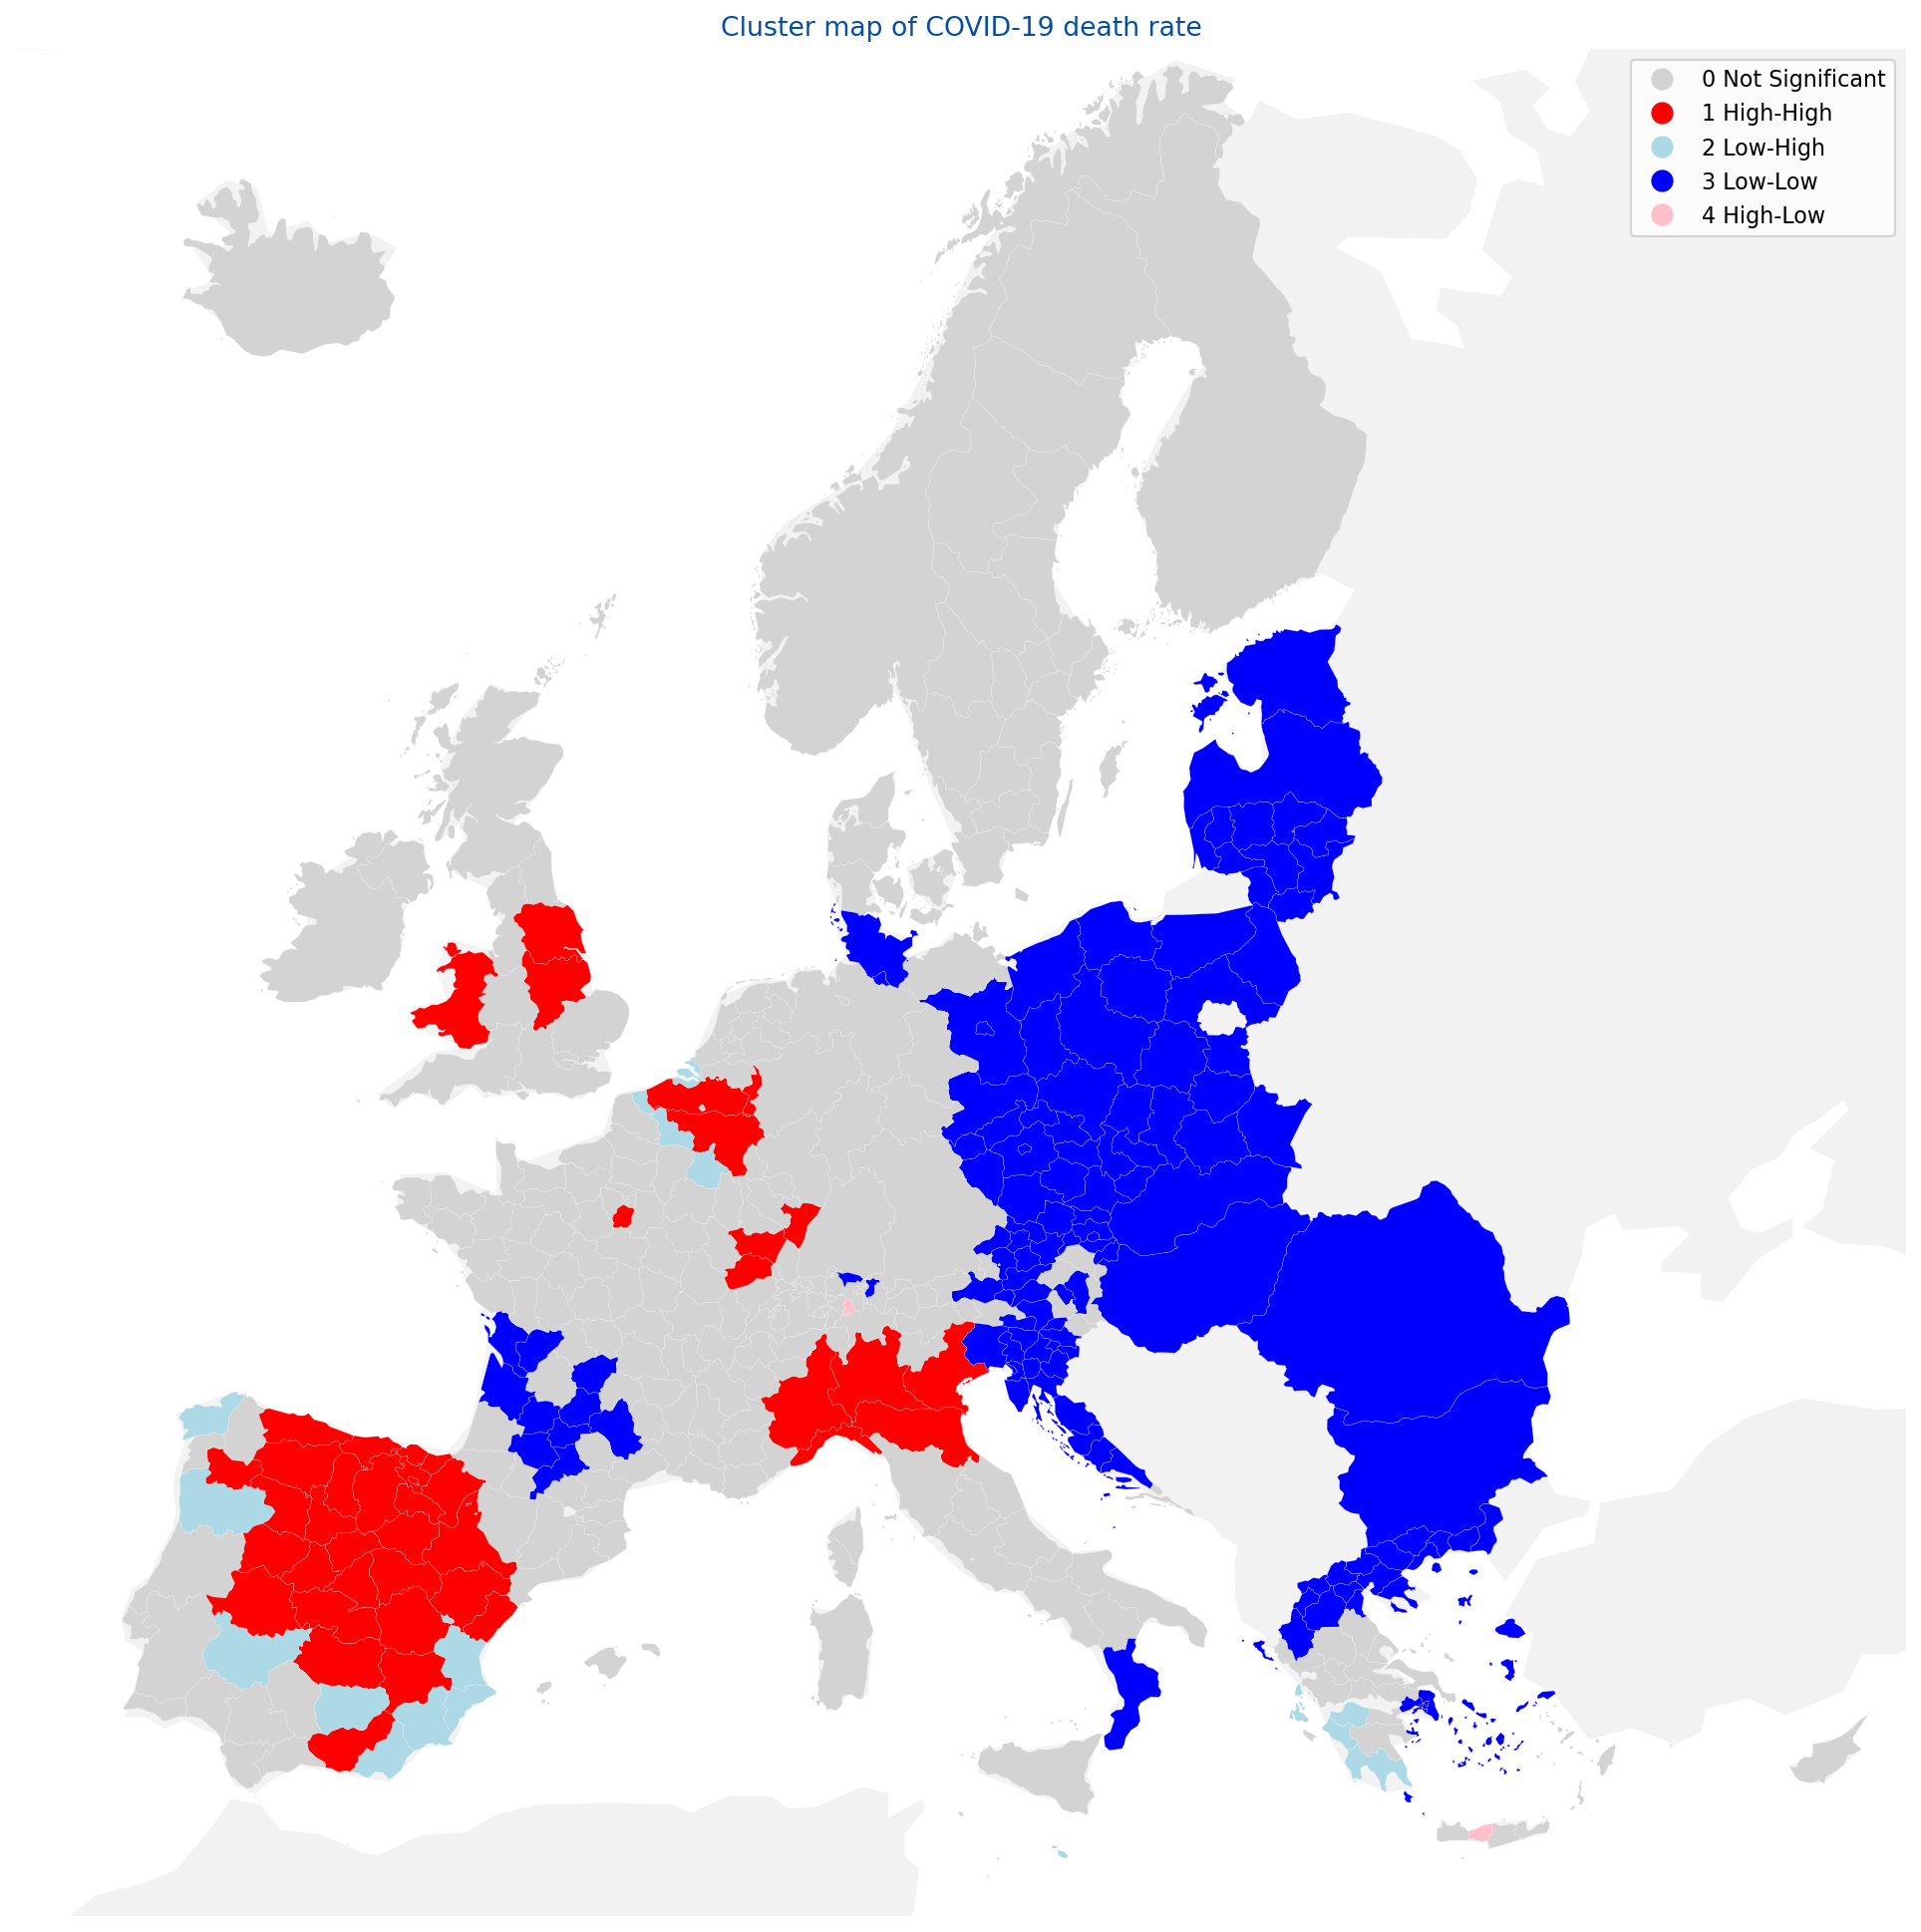

In [56]:
sig = 1 * (lisa_1.p_sim < 0.05)
hotspot = 1 * (sig * lisa_1.q==1)
coldspot = 3 * (sig * lisa_1.q==3)
doughnut = 2 * (sig * lisa_1.q==2)
diamond = 4 * (sig * lisa_1.q==4)
spots = hotspot + coldspot + doughnut + diamond
spot_labels = [ '0 Not Significant', '1 High-High', '2 Low-High', '3 Low-Low', '4 High-Low']
labels = [spot_labels[i] for i in spots]
hmap = colors.ListedColormap(['lightgrey', 'red', 'lightblue', 'blue', 'pink'])

fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)
world.plot(ax = ax, color = 'grey', alpha = .1)
geo_d_rate.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, legend = True,
        edgecolor='white', ax =ax)
# world[~(world['iso_a3'].isin(["IRL", "GBR", "ISL","SWE", "ITA"]))].boundary.plot(color = 'w', linewidth = 1.4 , zorder  =1, ax =ax)
plt.title('Cluster map of COVID-19 death rate', loc = 'center', color = '#054ea2')
plt.xlim(2.4e6, 6.6e6)
plt.ylim(0.13e7, 0.545e7)
plt.axis('off')

# 4. COVID-19 Deaths by country 

In [ ]:
ds = deaths.reset_index()

ds['Country'] = ds['nuts_id'].apply(lambda x: x[:2])
ds

with plt.style.context('seaborn-deep'):
    fig, ax = plt.subplots(2,1, figsize = (10,7), constrained_layout = True)
    ds.groupby('Country').sum().plot(kind = 'bar', ylabel = '', xlabel = '',
                                    cmap = 'Set3', ax =ax[0])
    ax[0].set_title('COVID-19 deaths by country',  color = '#054ea2')
    
sns.despine(offset=2)

# 7. Descriptive statistics

# 6. Correlation matrix